# Project Outline

In this project, we will analyze local and global temperature data and compare the temperature trends where I live to overall global temperature trends.

What tools were used for each step?
* SQL for data extraction
* Python and Jupyter Notebook for data wrangling and analysis

How did you calculate the moving average?
* Used df.rolling().mean() to perform a rolling calculation with the window set as 7 (for a 7 periods moving average)
* 
 
 
## 1) Extracting the data

### Query to extract city data:

SELECT year, city, country, avg_temp

FROM city_data

WHERE city = 'Rio De Janeiro';


### Query to extract global data:

SELECT year, avg_temp

FROM global_data;

## 2) Open Up The CSVs:

In [217]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import missingno

# Configurations
%matplotlib inline
sns.set_theme()

In [199]:
# Loading city data
city = pd.read_csv('city_data.csv')
city.columns = ['year', 'city', 'country', 'city_avg_temp']
city

,year,city,country,city_avg_temp
0,1832,Rio De Janeiro,Brazil,23.05
1,1833,Rio De Janeiro,Brazil,24.11
2,1834,Rio De Janeiro,Brazil,23.27
3,1835,Rio De Janeiro,Brazil,22.73
4,1836,Rio De Janeiro,Brazil,22.91
...,...,...,...,...
177,2009,Rio De Janeiro,Brazil,24.98
178,2010,Rio De Janeiro,Brazil,24.95
179,2011,Rio De Janeiro,Brazil,24.32
180,2012,Rio De Janeiro,Brazil,24.84


In [200]:
# Loading city data
world = pd.read_csv('global_data.csv')

# Renaming world dataframe columns for merging
world.columns = ['year','world_avg_temp']
world

,year,world_avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [201]:
# Merging dataframes
df = city.merge(world, on='year')

## 3) Calculating the 7 period moving averages

In [202]:
df

,year,city,country,city_avg_temp,world_avg_temp
0,1832,Rio De Janeiro,Brazil,23.05,7.45
1,1833,Rio De Janeiro,Brazil,24.11,8.01
2,1834,Rio De Janeiro,Brazil,23.27,8.15
3,1835,Rio De Janeiro,Brazil,22.73,7.39
4,1836,Rio De Janeiro,Brazil,22.91,7.70
...,...,...,...,...,...
177,2009,Rio De Janeiro,Brazil,24.98,9.51
178,2010,Rio De Janeiro,Brazil,24.95,9.70
179,2011,Rio De Janeiro,Brazil,24.32,9.52
180,2012,Rio De Janeiro,Brazil,24.84,9.51


In [203]:
# First we will look for missing values and fill them
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            182 non-null    int64  
 1   city            182 non-null    object 
 2   country         182 non-null    object 
 3   city_avg_temp   175 non-null    float64
 4   world_avg_temp  182 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.5+ KB


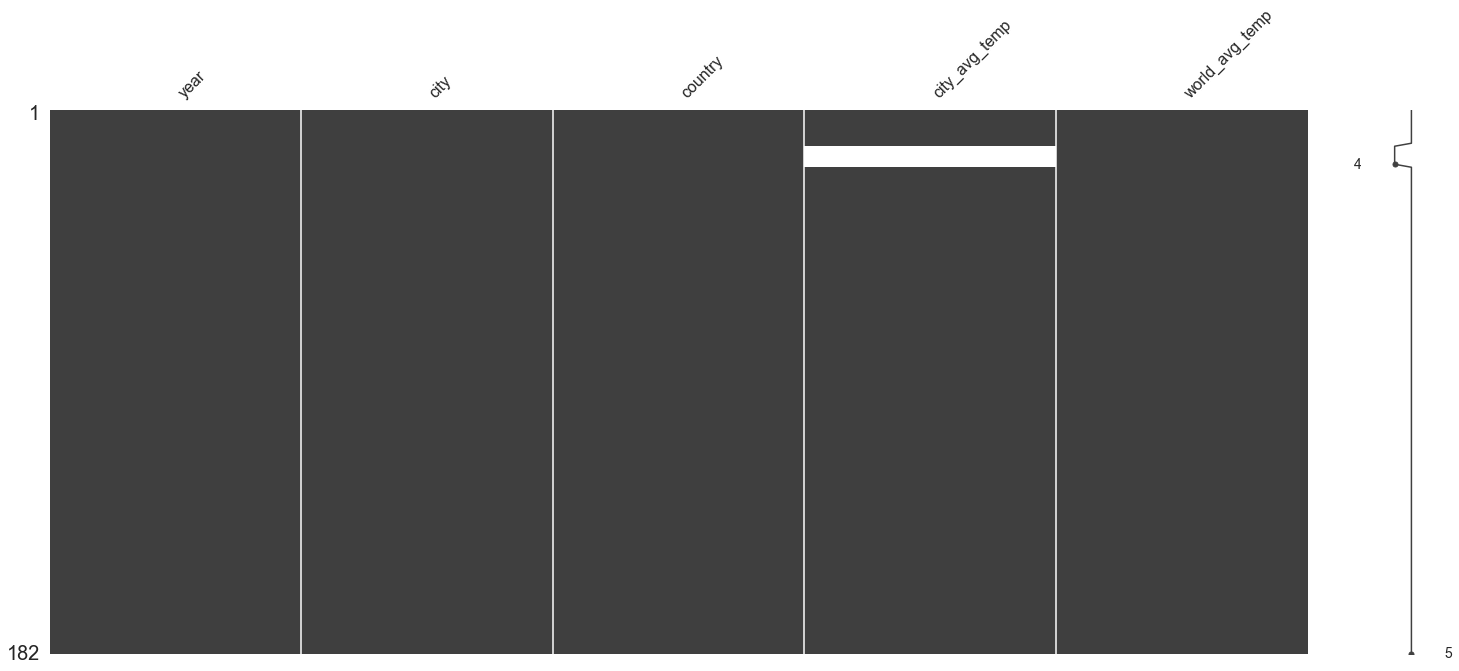

In [204]:
# Plotting missing values
missingno.matrix(df)

plt.show()

Here we can see that there are some missing values in the city_avg_temp column.

We will need to fill them, in order to calculate a more precise 7 periods moving average

In [205]:
# Filling missing values with the mean for the column
df['city_avg_temp'] = df['city_avg_temp'].fillna(df['city_avg_temp'].mean())

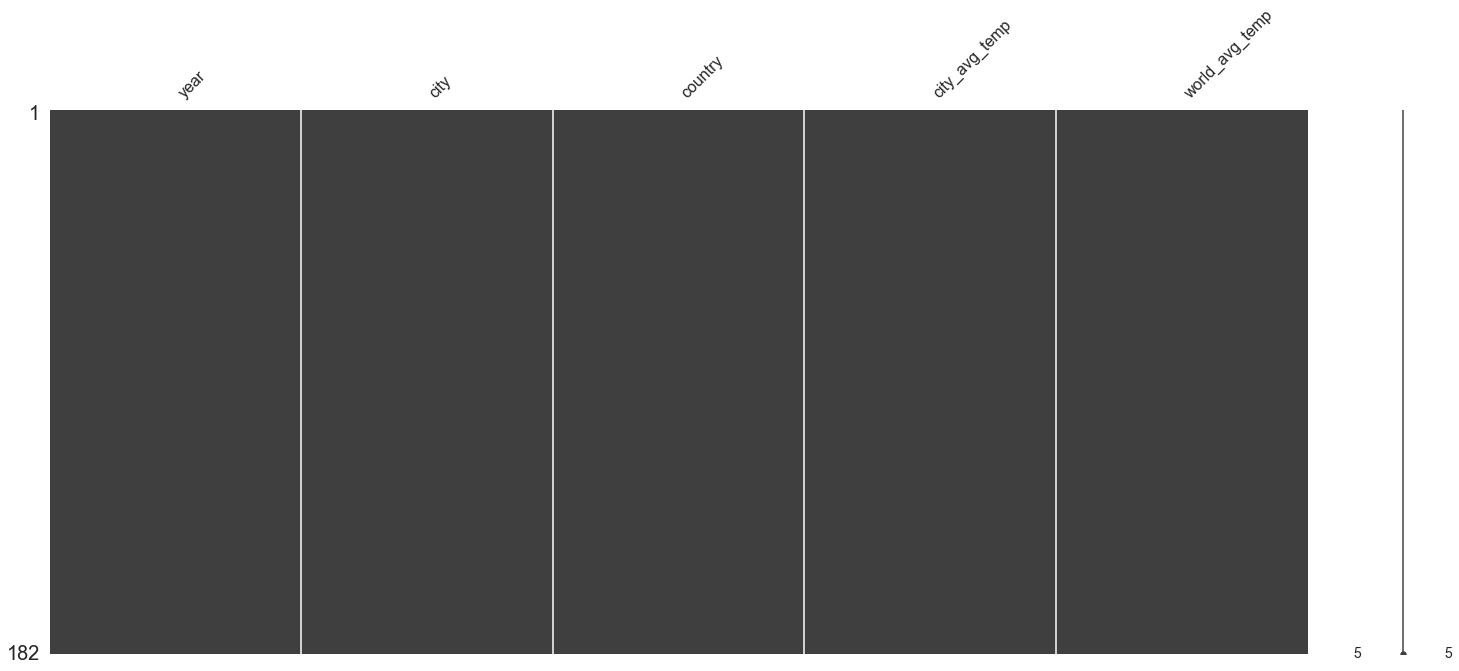

In [206]:
# Checking if missing values were filled
missingno.matrix(df)

plt.show()

Missing values have been filled

In [210]:
# Calculating the 7 periods moving average for the city average temperature
df['city_moving_avg'] = df['city_avg_temp'].rolling(7).mean()

# Filling the first seven moving average values with the first moving average data point available
df['city_moving_avg'] = df['city_moving_avg'].fillna(23.024286)

In [211]:
# Calculating the 7 periods moving average for the world average temperature
df['world_moving_avg'] = df['world_avg_temp'].rolling(7).mean()

# Filling the first seven moving average values with the first moving average data point available
df['world_moving_avg'] = df['world_avg_temp'].fillna(7.655714)

## 4) Creating a Line Chart

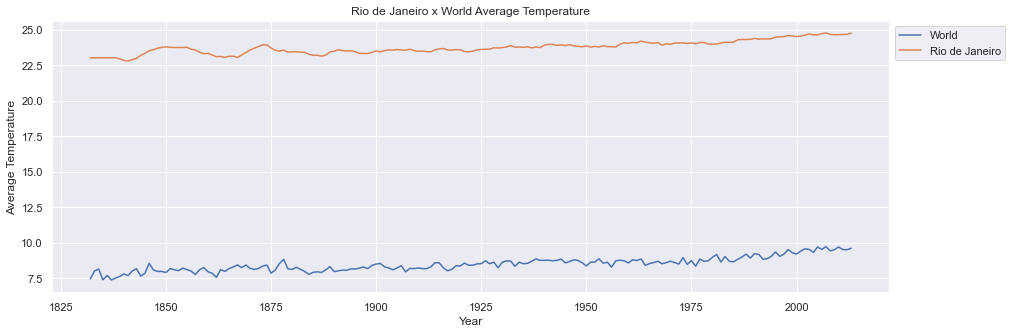

In [212]:
# Ploting the city and world moving averages together

plt.figure(figsize=(15,5))

sns.lineplot(data=df, x='year', y='world_moving_avg')
sns.lineplot(data=df, x='year', y='city_moving_avg')

plt.legend(labels=['World','Rio de Janeiro'], loc = 2, bbox_to_anchor = (1,1))

plt.title('Rio de Janeiro x World Average Temperature')
plt.ylabel('Average Temperature')
plt.xlabel('Year')

plt.show()

### 4.1) Evaluate Correlation

In [172]:
df.describe()

,year,city_avg_temp,world_avg_temp,city_moving_avg,world_moving_avg
count,182.000000,175.000000,182.000000,182.000000,182.000000
mean,1922.500000,23.791486,8.486374,23.714113,8.486374
std,52.683014,0.596963,0.496309,0.488551,0.496309
min,1832.000000,22.290000,7.380000,22.795714,7.380000
25%,1877.250000,23.370000,8.135000,23.410357,8.135000
50%,1922.500000,23.820000,8.485000,23.682857,8.485000
75%,1967.750000,24.210000,8.750000,24.043929,8.750000
max,2013.000000,25.190000,9.730000,24.778571,9.730000


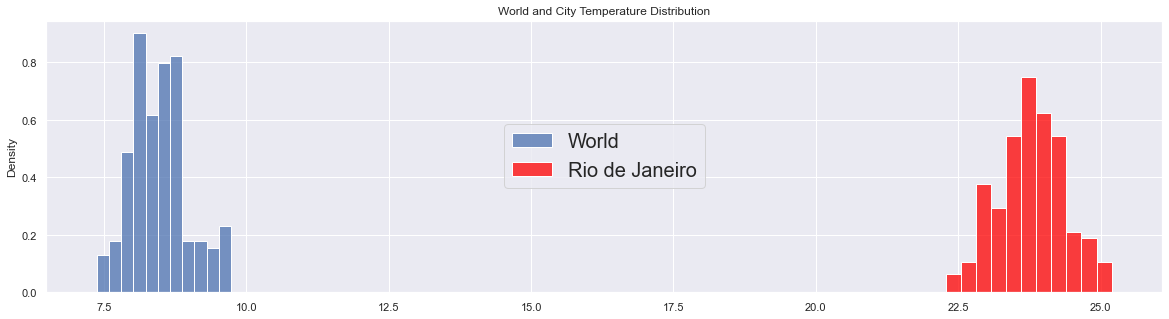

In [213]:
# Plotting distribution
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='world_avg_temp', stat='density')
sns.histplot(data=df, x='city_avg_temp', stat='density', color='red')

plt.legend(labels=['World','Rio de Janeiro'], loc='center', prop={'size': 20})

plt.title('World and City Temperature Distribution')
plt.xlabel('')


plt.show()

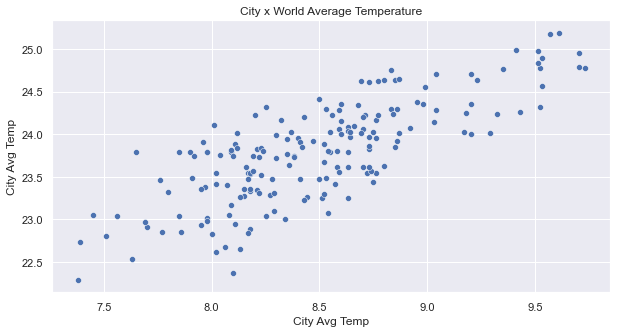

In [215]:
# Visualizing Correlation

plt.figure(figsize=(10,5))

sns.scatterplot(x=df['world_avg_temp'], y=df['city_avg_temp'])

plt.title('City x World Average Temperature')
plt.ylabel('City Avg Temp')
plt.xlabel('City Avg Temp')


plt.show()

In [216]:
# Calculating Persons Correlation

from scipy.stats import pearsonr
corr, _ = pearsonr(df['world_avg_temp'], df['city_avg_temp'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.779


## 5) Observations

### 5.1) About the trend:

* Data shows that Rio de Janeiro is hotter on average, compared to the global average.
* This difference has been consistent over time.
* The overall trend is a constant increase in temperature over the years for both the world and the Rio de Janeiro city.


### 5.2) About the distribution

* Both the city and the world average temperature follows a Gaussian-like distribution.
* This means we can use Pearsons Correlation to evaluate the correlation between these two variables (next item).
* City average temperature is more spread out (std: 0.59) than the world's average temperature (std: 0.49).
* We can see by the line chart and by the histogram that there are no overlaps between both datasets. 

### 5.3) About the correlation:

* Pearson's Correlation for these two variables is 0.779 .
* This means that there is a notable positive correlation (above 0.5).

## References:
    
https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/